# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
%matplotlib inline
    
from numpy import nan
from pandas import (DataFrame, date_range)
import matplotlib.pyplot as plt

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]]) \
    .stack()
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

<AxesSubplot:xlabel='date'>

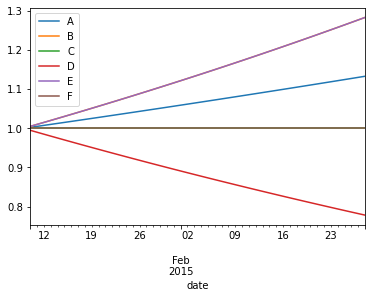

In [3]:
prices.plot()

In [4]:
prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [5]:
factor.head(10)

date         
2015-01-15  A    3.0
            B    4.0
            C    2.0
            D    1.0
2015-01-16  A    3.0
            D    1.0
            E    4.0
            F    2.0
2015-01-17  A    3.0
            B    4.0
dtype: float64

In [6]:
factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 3), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [7]:
factor_data.head(10)

1D        3D  factor   group  factor_quantile
date       asset                                                   
2015-01-15 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4
           C      0.0000  0.000000     2.0  Group1                2
           D     -0.0050 -0.014925     1.0  Group2                1
2015-01-16 A      0.0025  0.007519     3.0  Group1                3
           D     -0.0050 -0.014925     1.0  Group2                1
           E      0.0050  0.015075     4.0  Group1                4
           F      0.0000  0.000000     2.0  Group2                2
2015-01-17 A      0.0025  0.007519     3.0  Group1                3
           B      0.0050  0.015075     4.0  Group2                4

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1D,3D
Ann. alpha,0.762,0.766
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),50.000,50.000
Mean Period Wise Return Bottom Quantile (bps),-50.000,-50.000
Mean Period Wise Spread (bps),100.000,100.000


<Figure size 432x288 with 0 Axes>

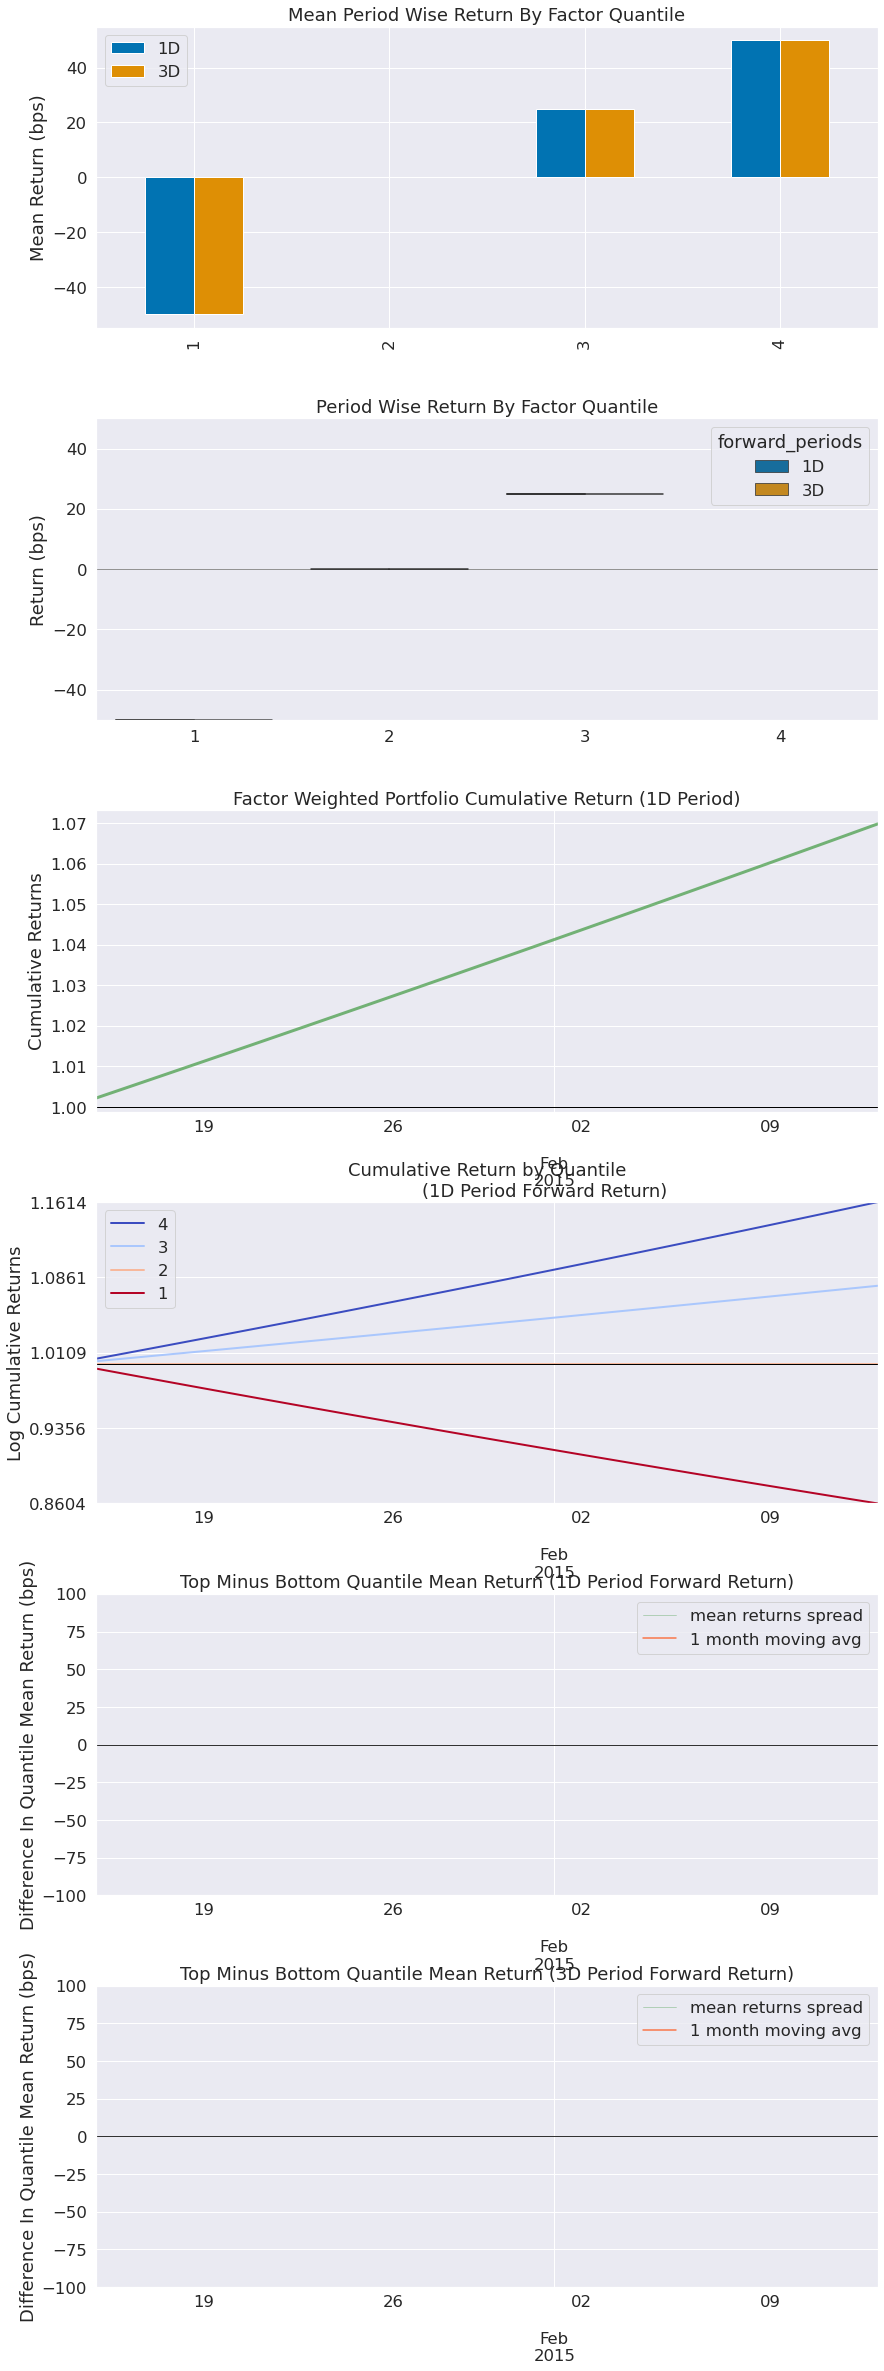

Information Analysis


,1D,3D
IC Mean,1.0,1.0
IC Std.,0.0,0.0
Risk-Adjusted IC,inf,inf
t-stat(IC),inf,inf
p-value(IC),0.0,0.0
IC Skew,0.0,0.0
IC Kurtosis,-3.0,-3.0


/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.

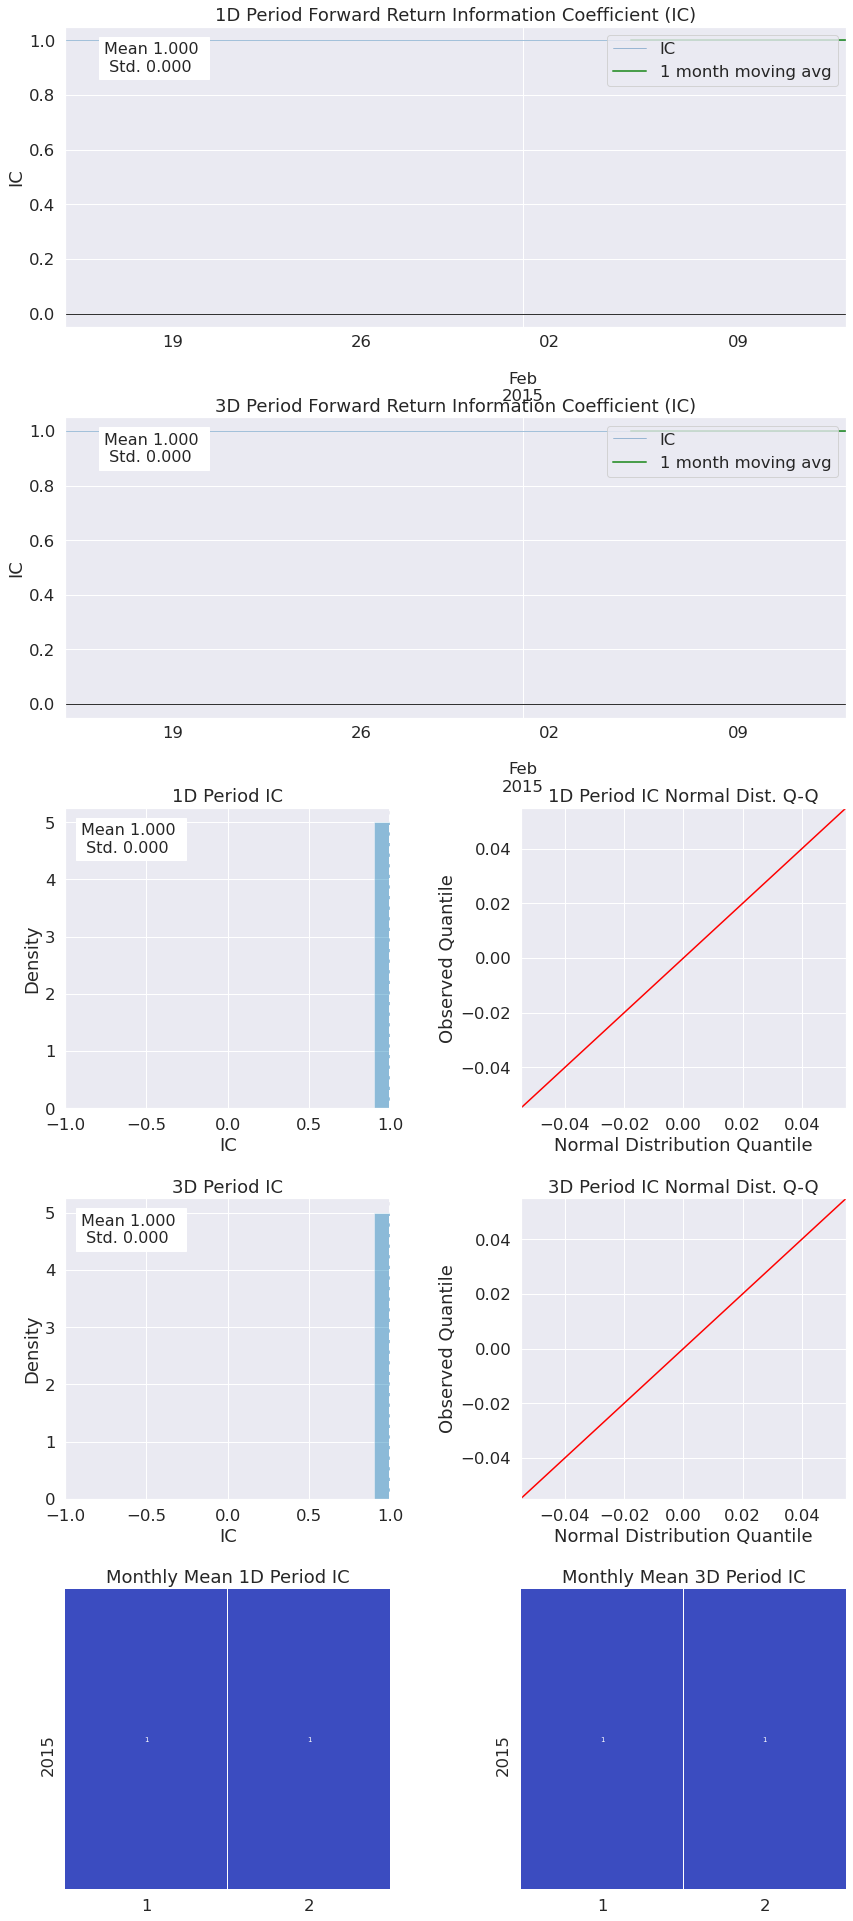

Turnover Analysis


/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


,1D,3D
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1D,3D
Mean Factor Rank Autocorrelation,1.0,1.0


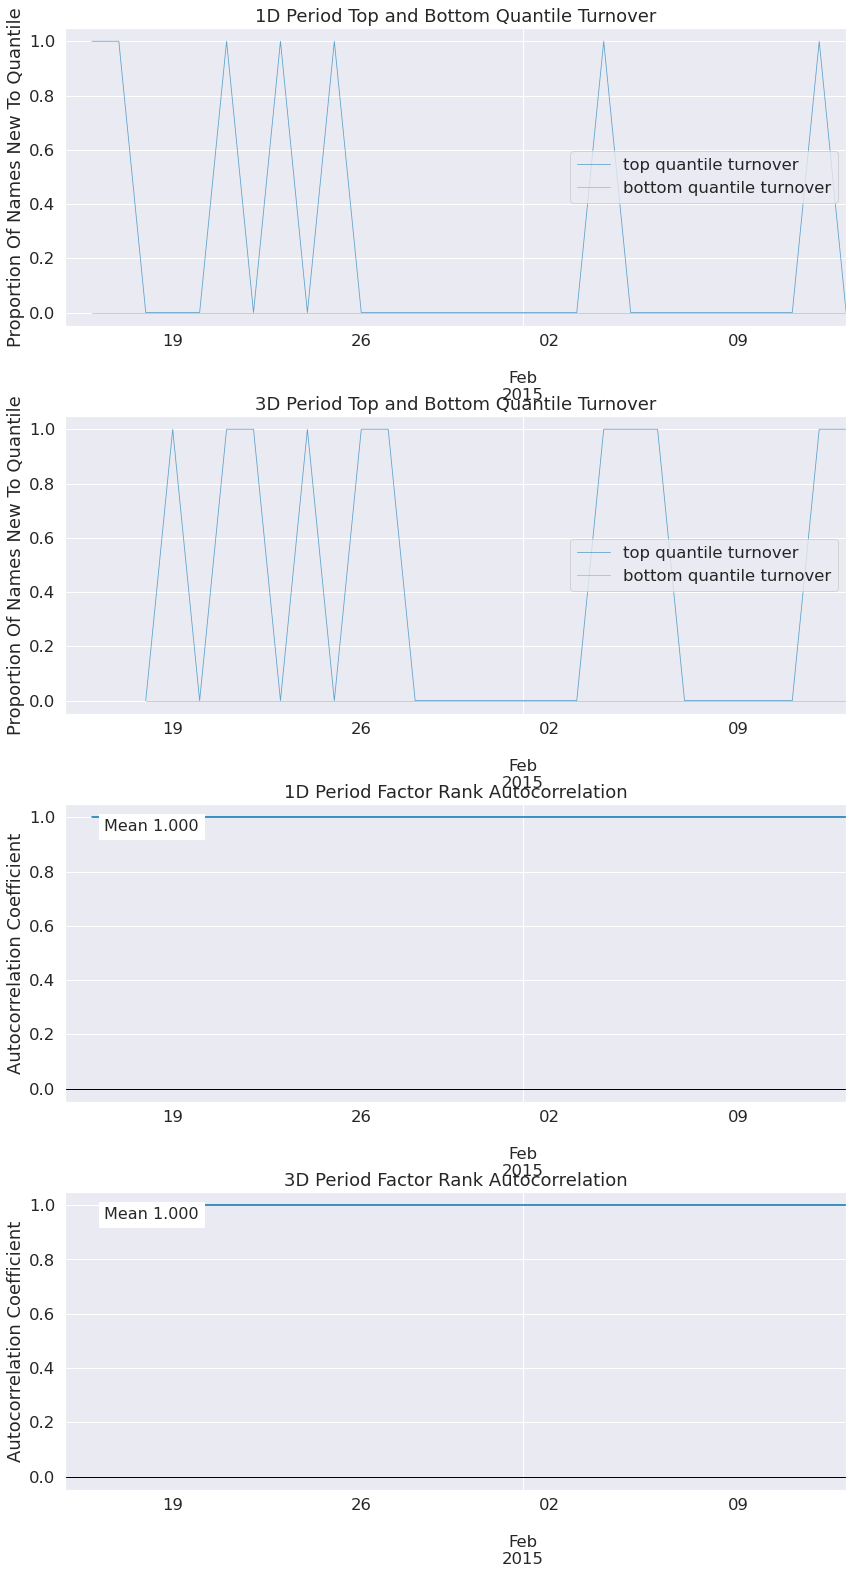

<Figure size 432x288 with 0 Axes>

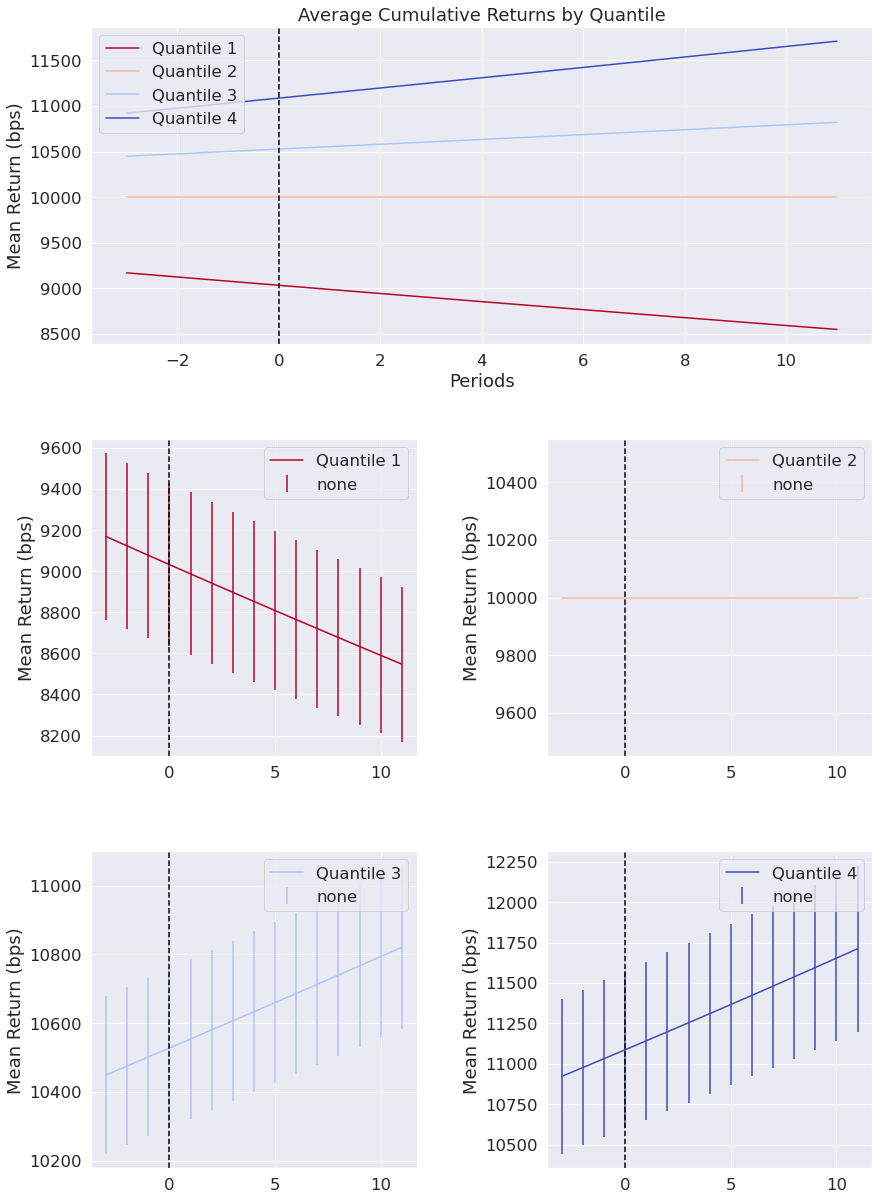

In [8]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1D,3D
Ann. alpha,1.778,1.767
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),43.750,43.669
Mean Period Wise Return Bottom Quantile (bps),-56.250,-56.459
Mean Period Wise Spread (bps),100.000,100.128


<Figure size 432x288 with 0 Axes>

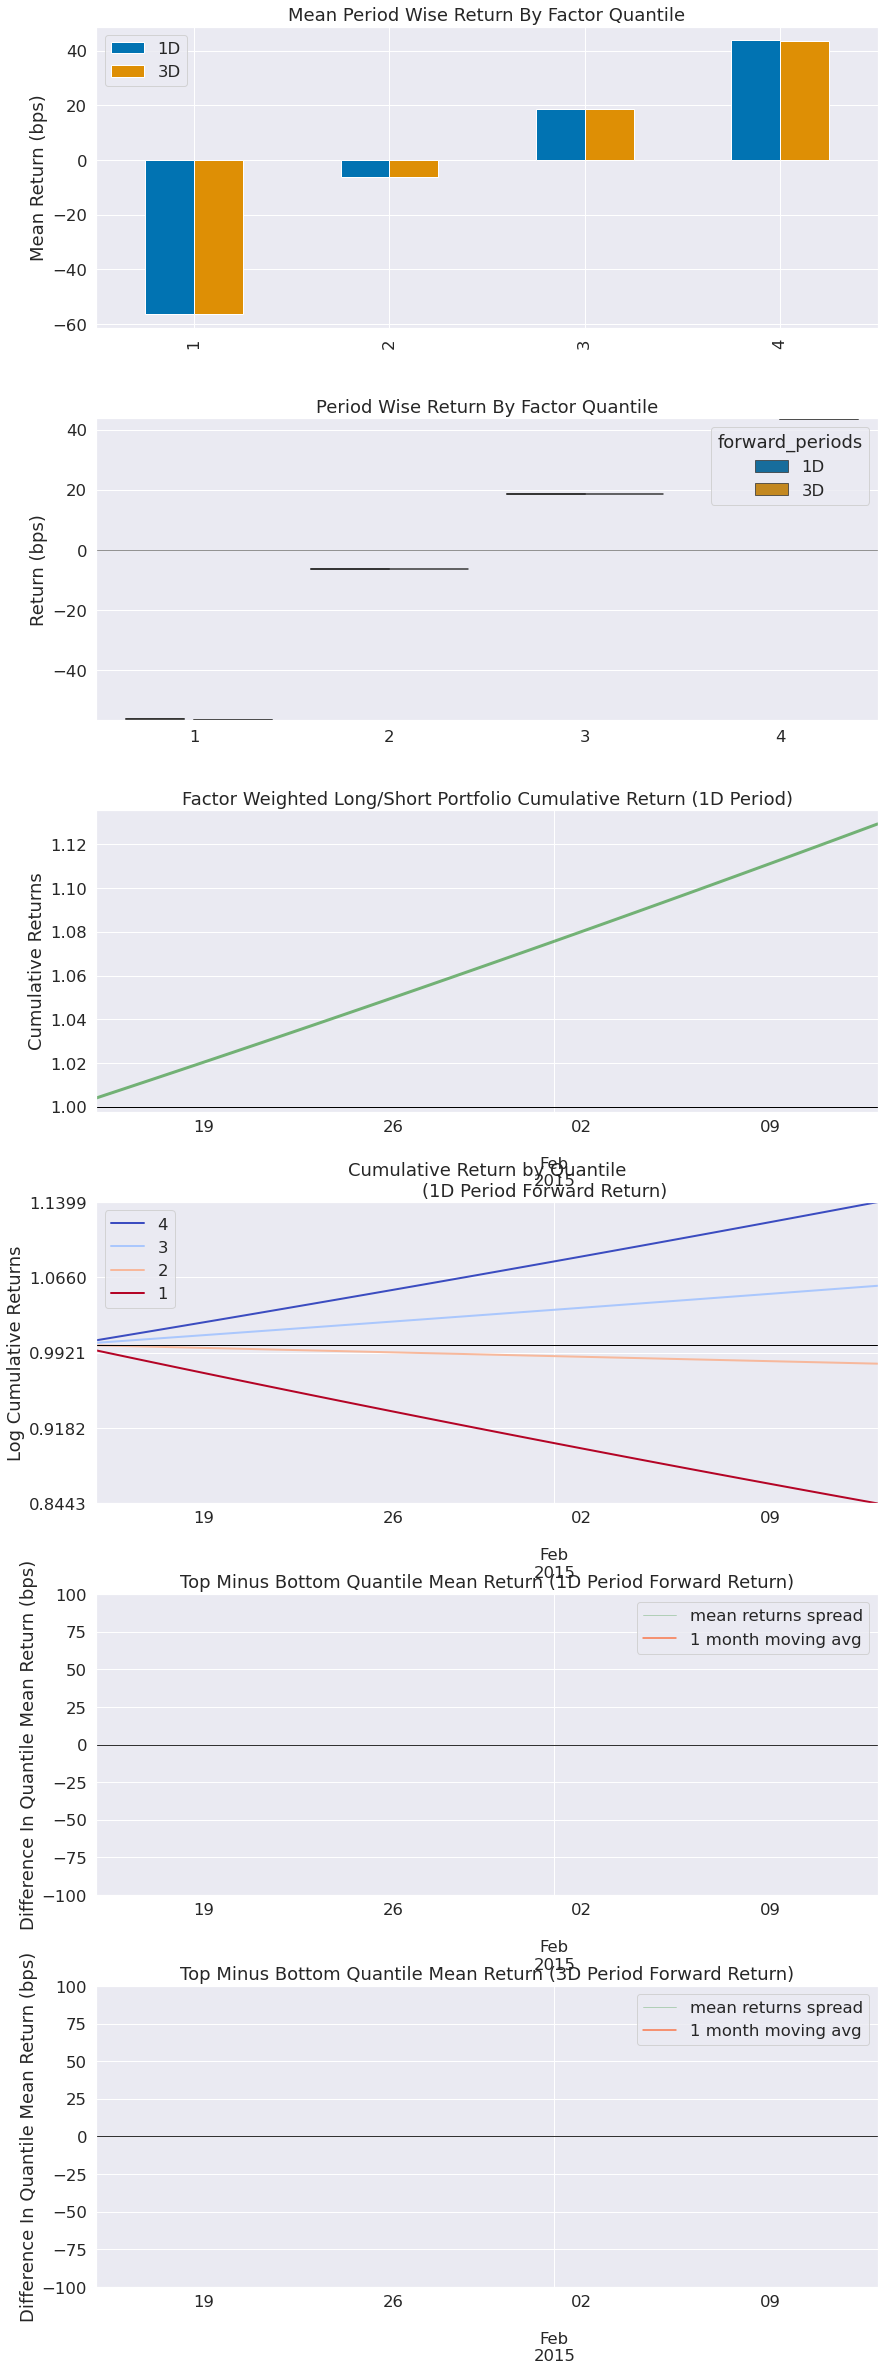

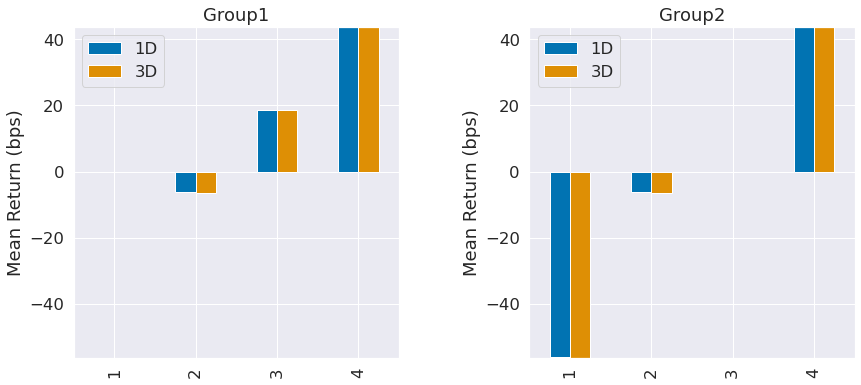

Information Analysis


,1D,3D
IC Mean,1.0,1.0
IC Std.,0.0,0.0
Risk-Adjusted IC,inf,inf
t-stat(IC),inf,inf
p-value(IC),0.0,0.0
IC Skew,0.0,0.0
IC Kurtosis,-3.0,-3.0


/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.

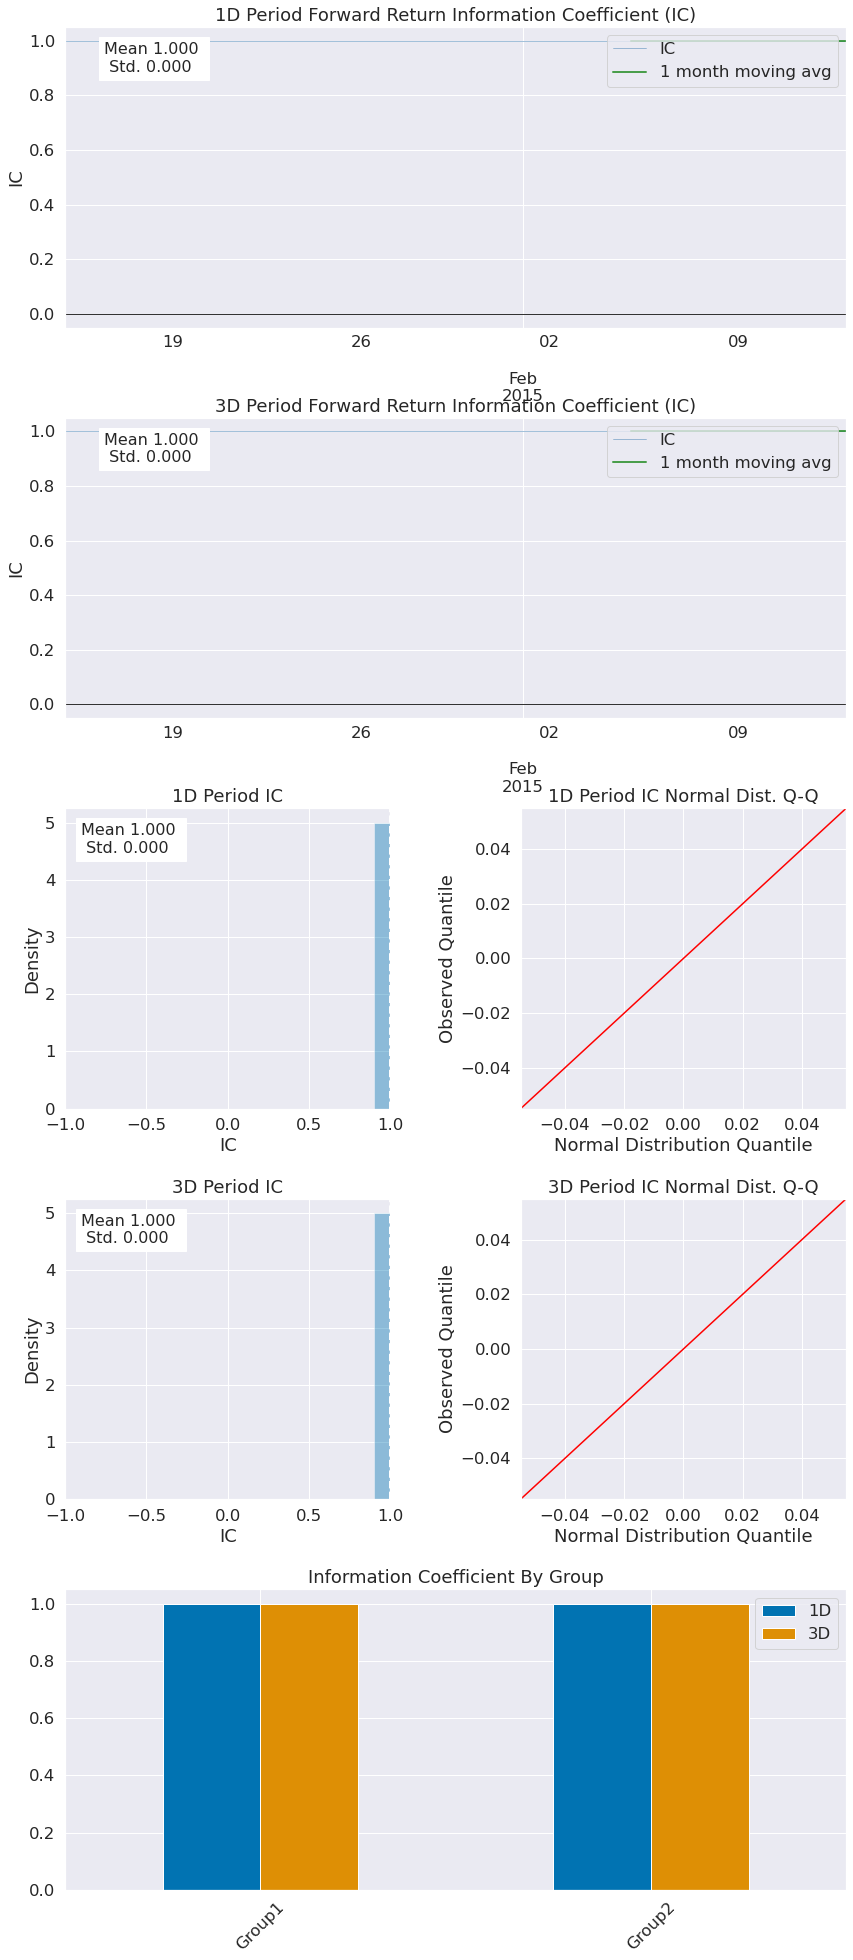

Turnover Analysis


/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


,1D,3D
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1D,3D
Mean Factor Rank Autocorrelation,1.0,1.0


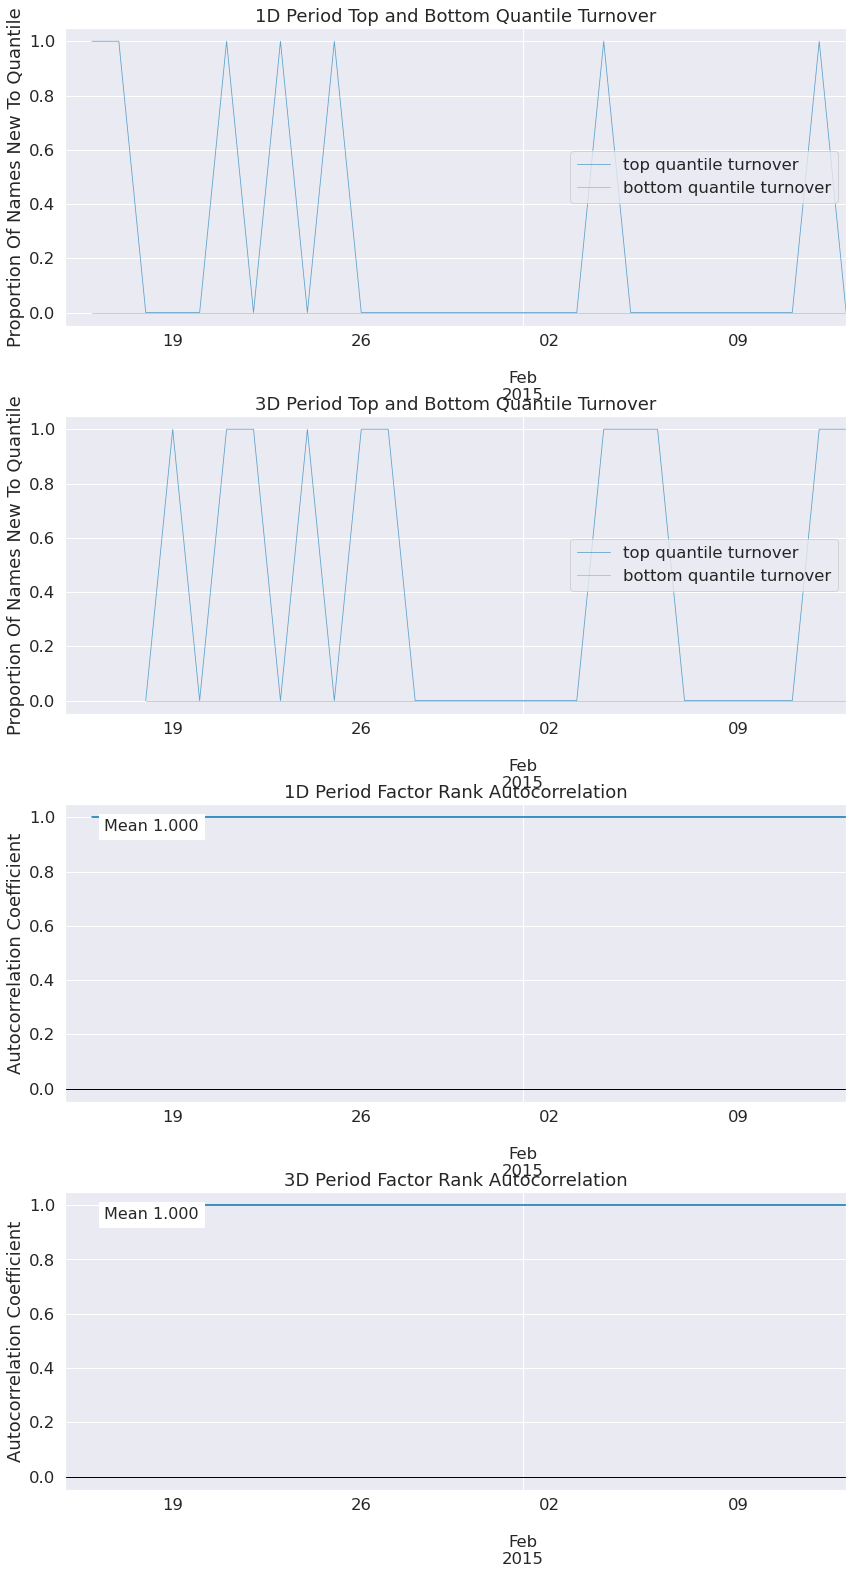

<Figure size 432x288 with 0 Axes>

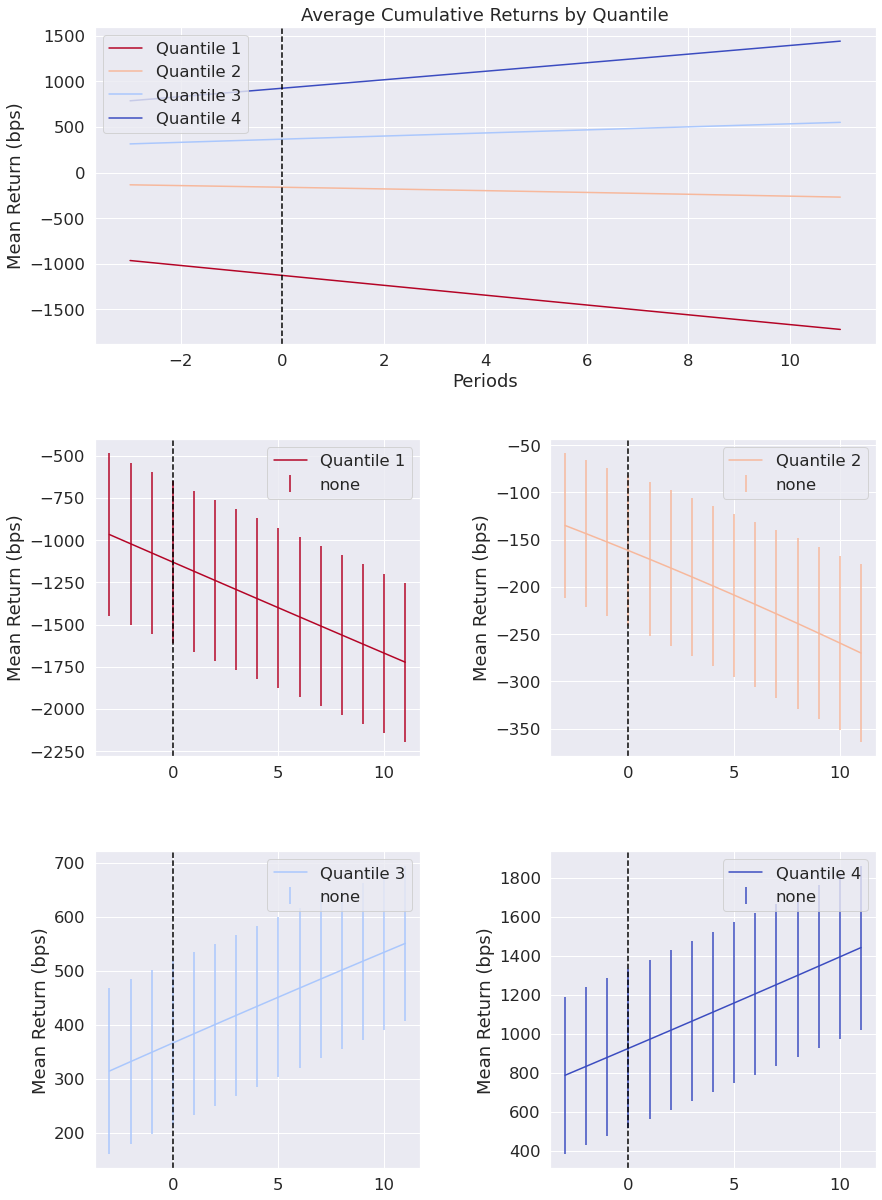

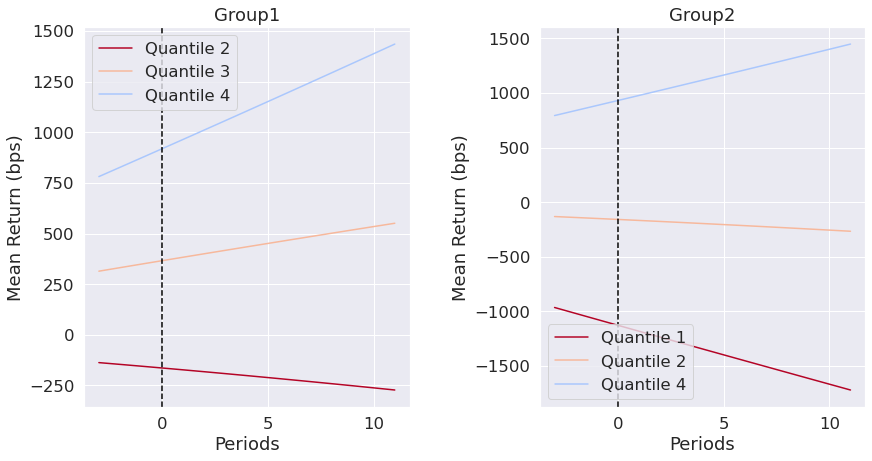

In [9]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,1.0,1.0,0.0,30,25.0
2,2.0,2.0,2.0,0.0,30,25.0
3,3.0,3.0,3.0,0.0,30,25.0
4,4.0,4.0,4.0,0.0,30,25.0


Returns Analysis


,1D,3D
Ann. alpha,0.876,0.873
beta,0.000,0.000
Mean Period Wise Return Top Quantile (bps),31.250,31.200
Mean Period Wise Return Bottom Quantile (bps),-37.500,-37.579
Mean Period Wise Spread (bps),68.750,68.760


<Figure size 432x288 with 0 Axes>

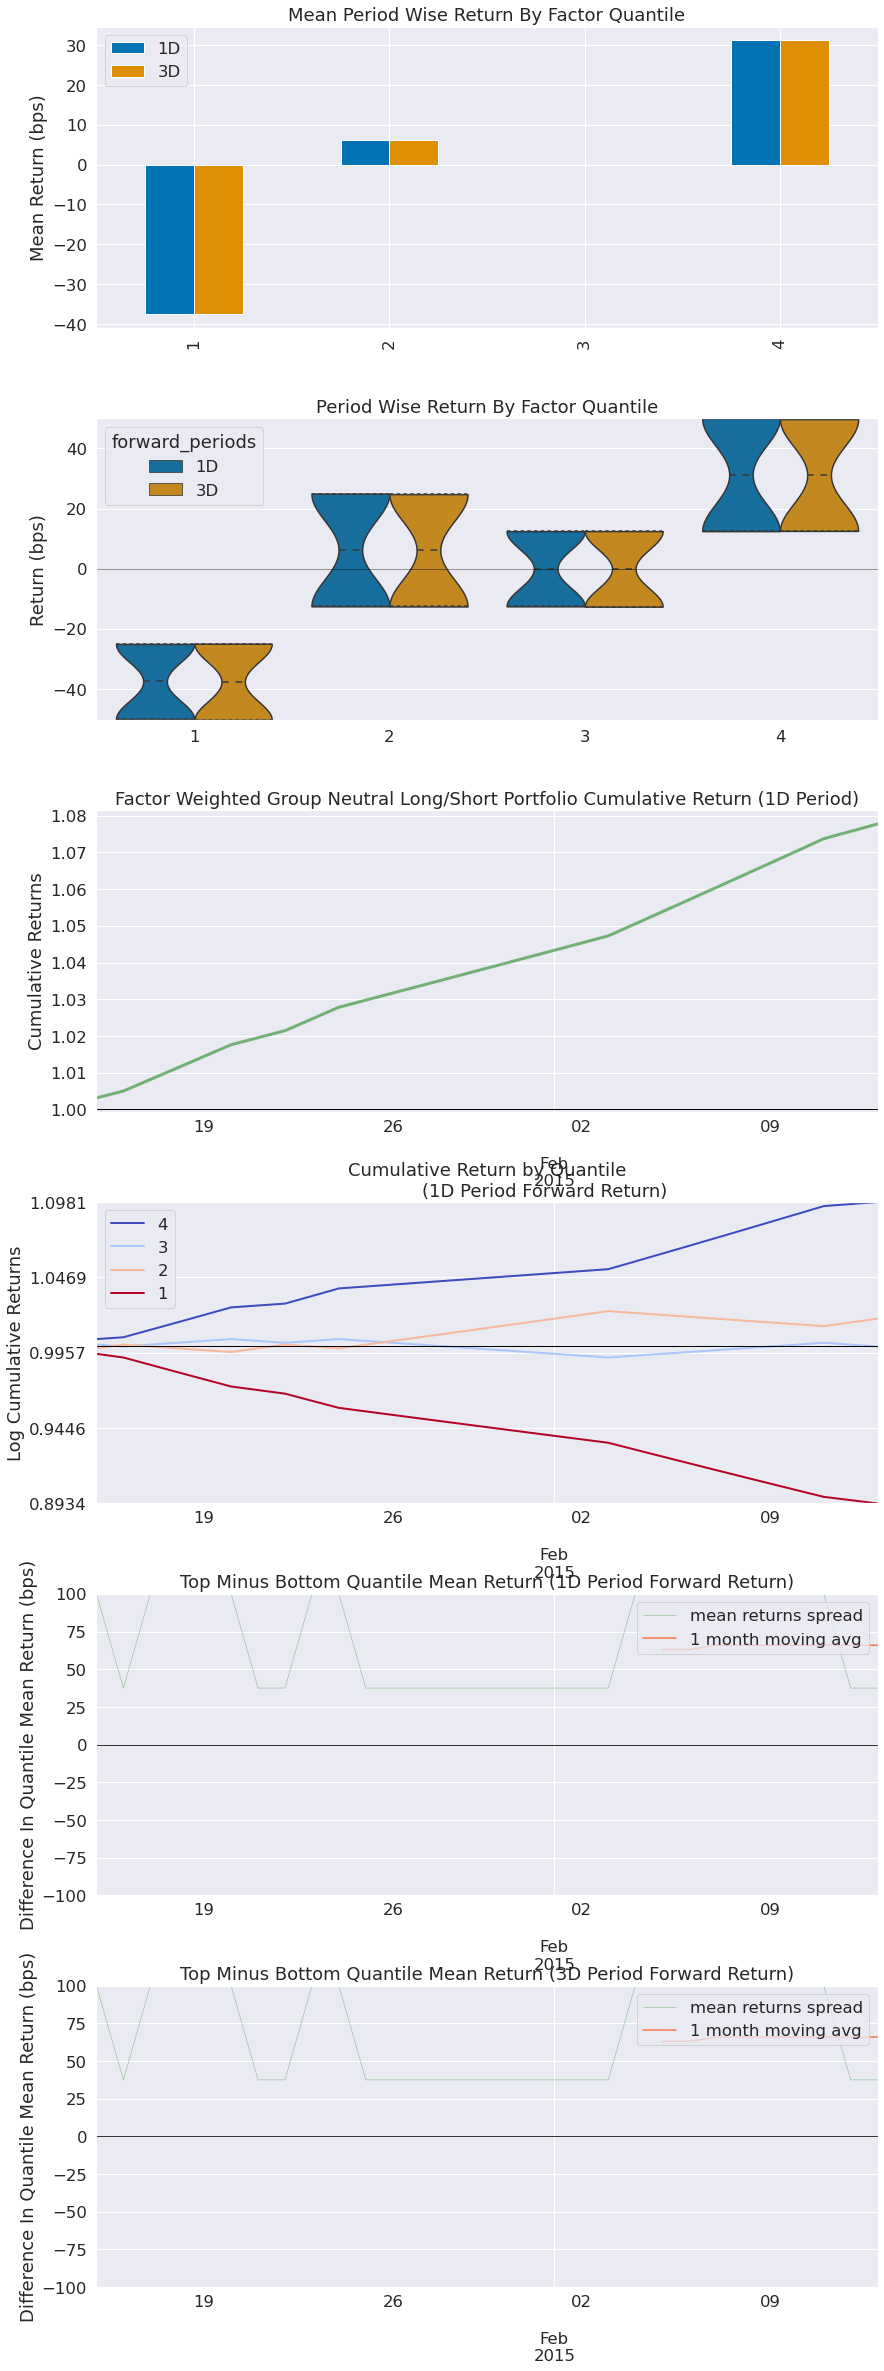

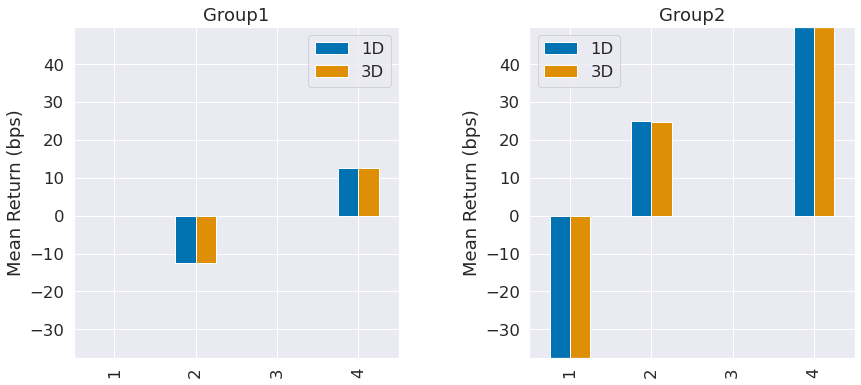

Information Analysis


,1D,3D
IC Mean,0.700,0.700
IC Std.,0.305,0.305
Risk-Adjusted IC,2.294,2.294
t-stat(IC),12.565,12.565
p-value(IC),0.000,0.000
IC Skew,0.000,0.000
IC Kurtosis,-2.000,-2.000


/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


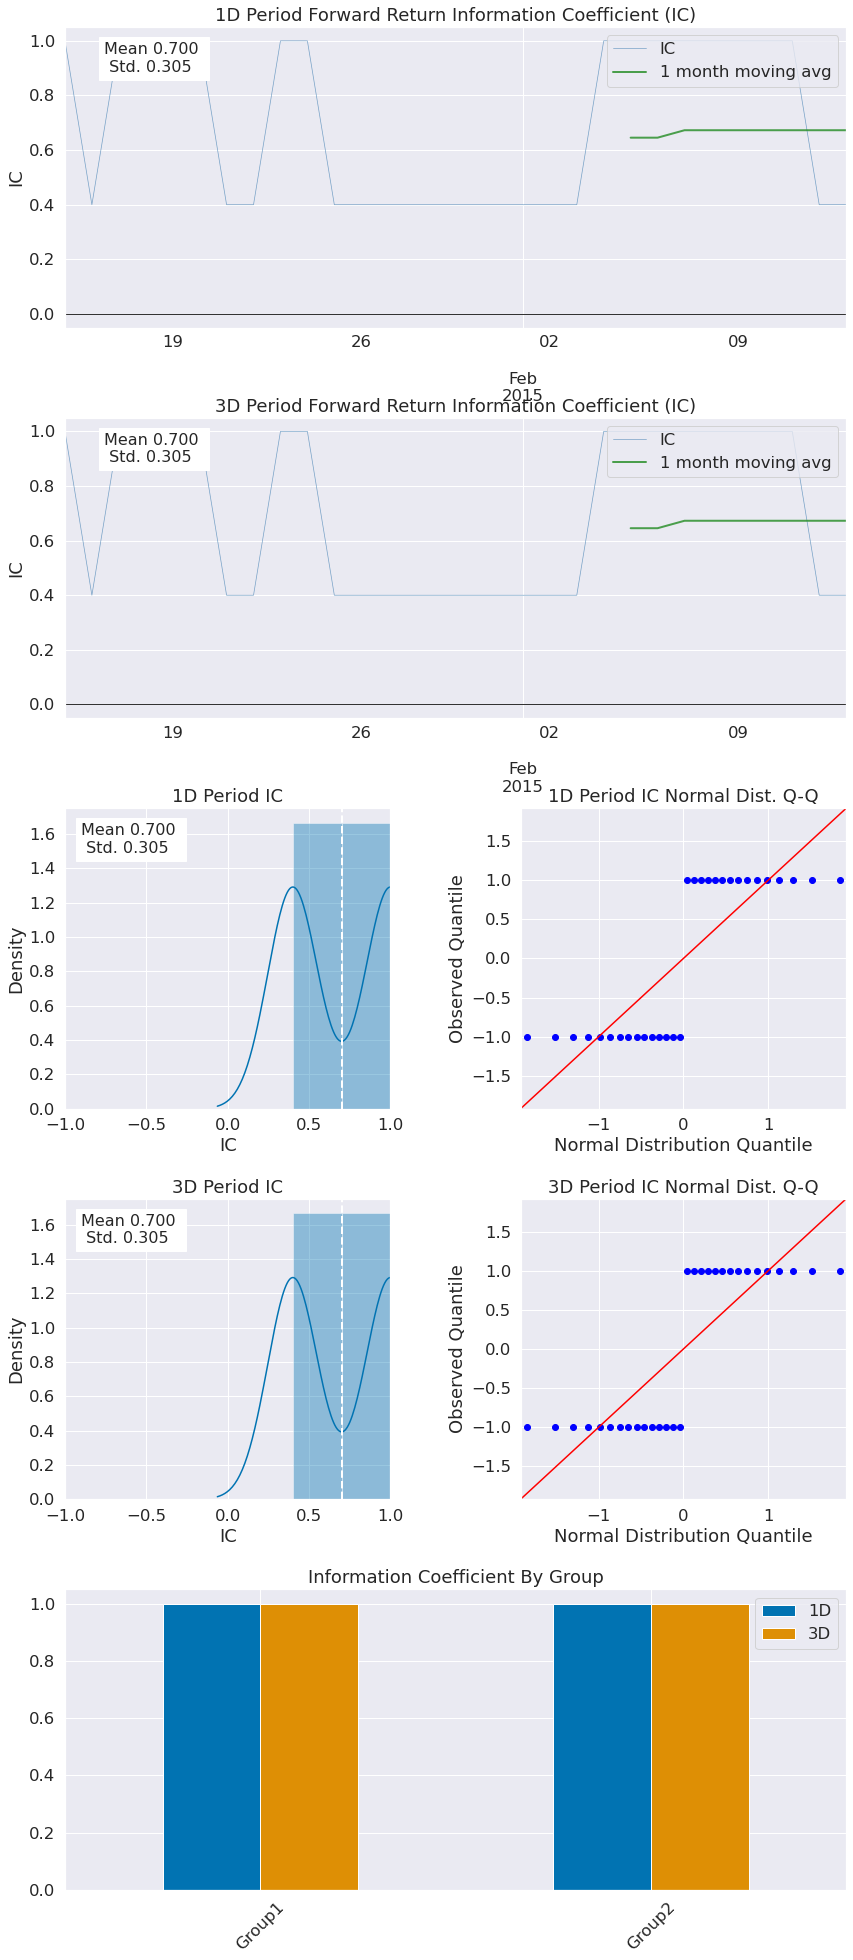

Turnover Analysis


/home/romet/miniconda3/envs/alphalens/lib/python3.6/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


,1D,3D
Quantile 1 Mean Turnover,0.000,0.000
Quantile 2 Mean Turnover,0.241,0.407
Quantile 3 Mean Turnover,0.000,0.000
Quantile 4 Mean Turnover,0.241,0.407


,1D,3D
Mean Factor Rank Autocorrelation,1.0,1.0


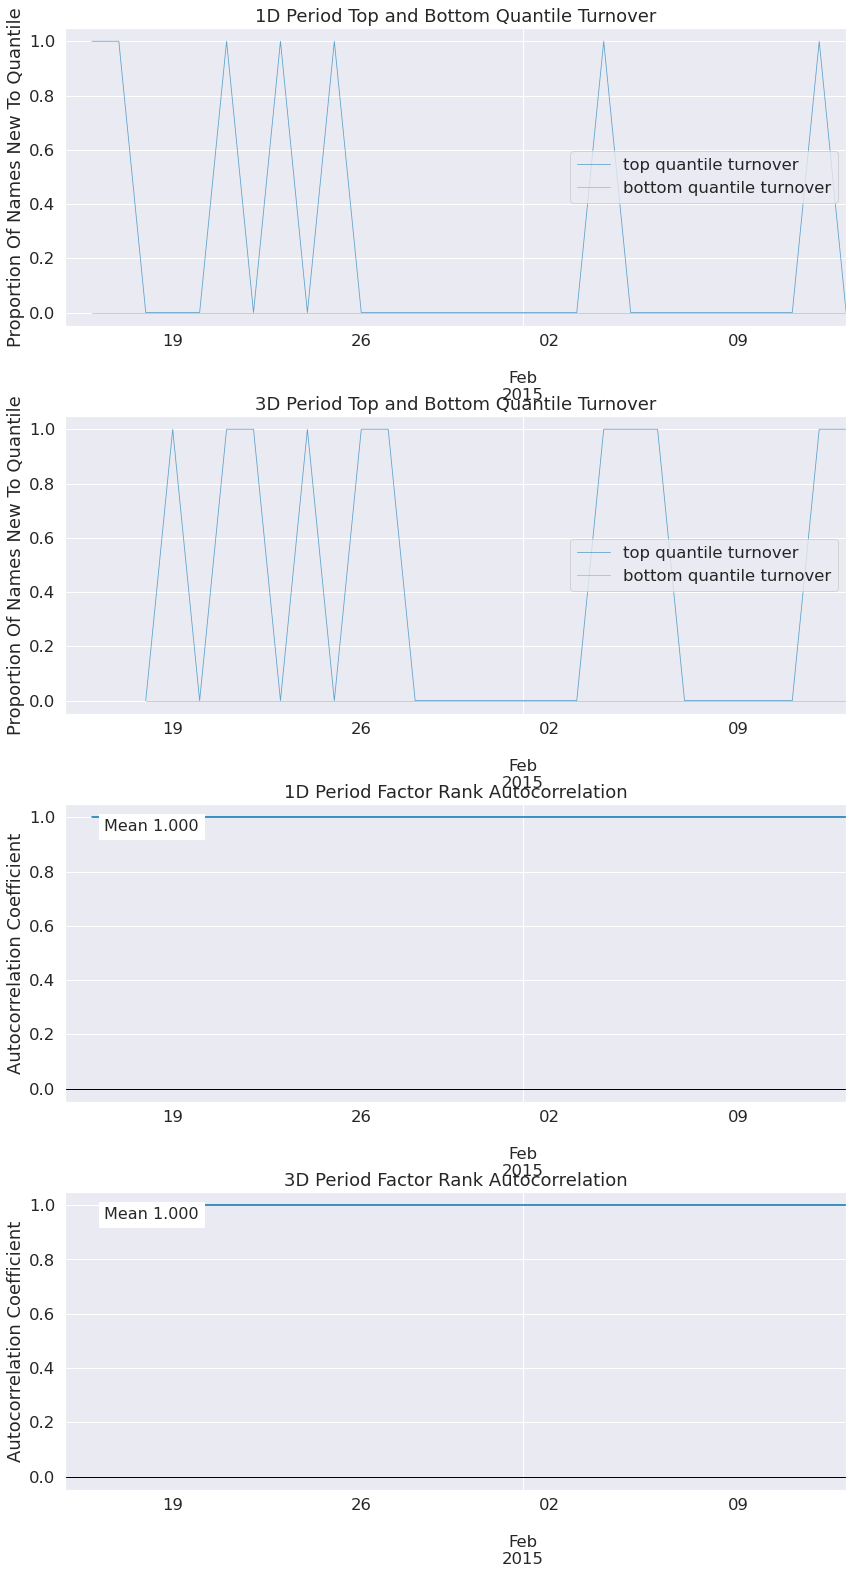

<Figure size 432x288 with 0 Axes>

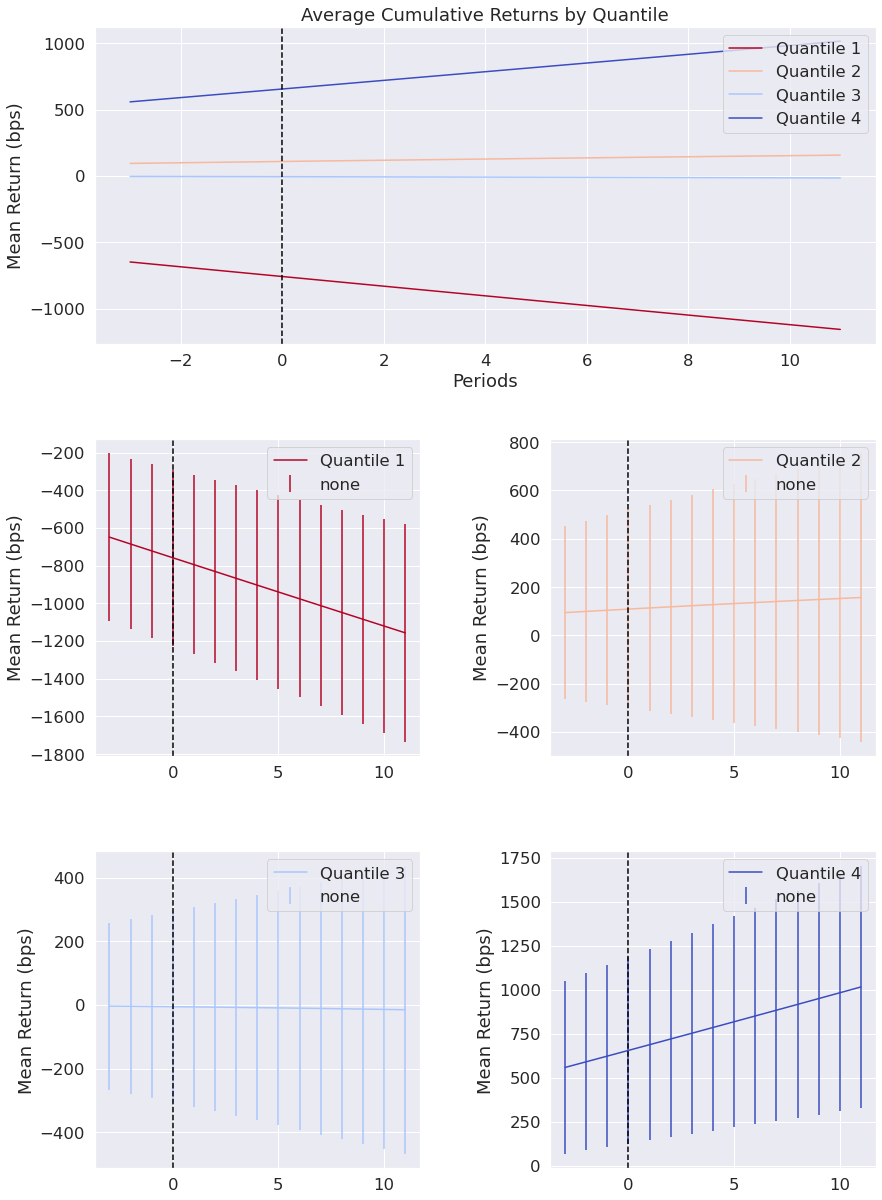

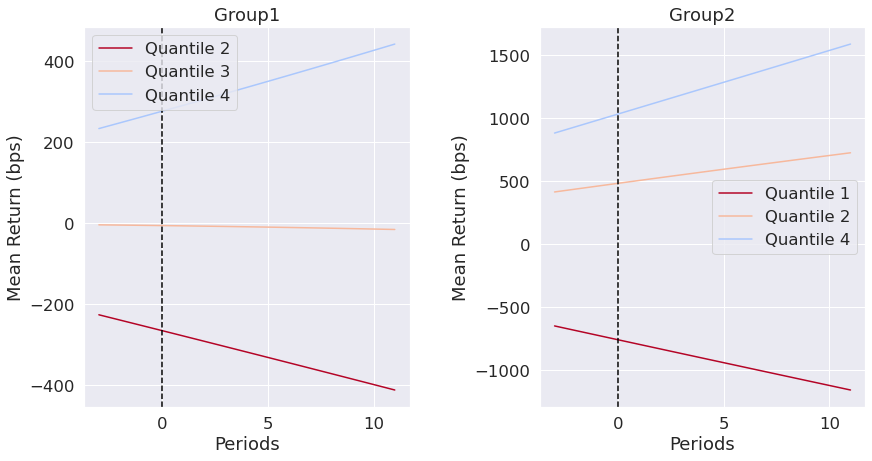

In [10]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)